In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import radians, pi
plt.style.use(['science','no-latex'])
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# import the modules
# import sys
# sys.path.append('../')
import estimator as es

In [3]:
# Initialize Orekit
import orekit
vm = orekit.initVM()

from orekit.pyhelpers import setup_orekit_curdir
setup_orekit_curdir()

from org.orekit.frames import FramesFactory, TopocentricFrame
from org.orekit.bodies import OneAxisEllipsoid, GeodeticPoint
from org.orekit.time import TimeScalesFactory, AbsoluteDate, DateComponents, TimeComponents
from org.orekit.utils import IERSConventions, Constants
from org.orekit.propagation.analytical.tle import TLE, TLEPropagator

In [4]:
# TLE data format

1 54381U 22163A   23002.03207843 -.00000023  00000+0  37829-4 0  9997
2 54381  67.1555 294.9262 0006779 264.4732  95.5556 13.96674633  4516

SyntaxError: invalid syntax (2820011165.py, line 3)

In [5]:
#TLE data
tle_line1 = "1 54381U 22163A   23002.03207843 -.00000023  00000+0  37829-4 0  9997"
tle_line2 = "2 54381  67.1555 294.9262 0006779 264.4732  95.5556 13.96674633  4516"

mytle = TLE(tle_line1,tle_line2)
print (mytle)
print ('\nEpoch :',mytle.getDate())
print ('Ballastic coefficient :',mytle.getBStar())

1 54381U 22163A   23002.03207843 -.00000023  00000+0  37829-4 0  9997
2 54381  67.1555 294.9262 0006779 264.4732  95.5556 13.96674633  4516

Epoch : 2023-01-02T00:46:11.576352Z
Ballastic coefficient : 3.7829e-05


In [6]:
# Preparing the Coordinate systems and propagator

ITRF = FramesFactory.getITRF(IERSConventions.IERS_2010, True)
earth = OneAxisEllipsoid(Constants.WGS84_EARTH_EQUATORIAL_RADIUS, 
                         Constants.WGS84_EARTH_FLATTENING, 
                         ITRF)

inertialFrame = FramesFactory.getEME2000()

# TLE Propagator
propagator = TLEPropagator.selectExtrapolator(mytle)

In [20]:
# Set the start and end date
dt = 60.0 # shifted time in propogation in [s]
days = 3 # propagation period
propt = 86400.0*days
nrange = int(86400.0*days/dt)
extrapDate = AbsoluteDate(2022, 1, 2, 12, 0, 0.0, TimeScalesFactory.getUTC())
finalDate = extrapDate.shiftedBy(propt) #seconds

# propogation
pos= []
vel =[]

while (extrapDate.compareTo(finalDate) <= 0.0):  
    pv = propagator.getPVCoordinates(extrapDate, inertialFrame)
    pos.append(pv.getPosition())
    vel.append(pv.getVelocity())
    extrapDate = extrapDate.shiftedBy(dt)

In [21]:
data = []
period = np.arange(0,propt,dt,dtype='int')

for i,position in enumerate(period):
    data.append([period[i],pos[i].x,pos[i].y,pos[i].z,vel[i].x,vel[i].y,vel[i].z])
    
np.savetxt('TLE.out',data,fmt='%f',header='time[s]  x   y   z   vx   vy   vz [m] ')

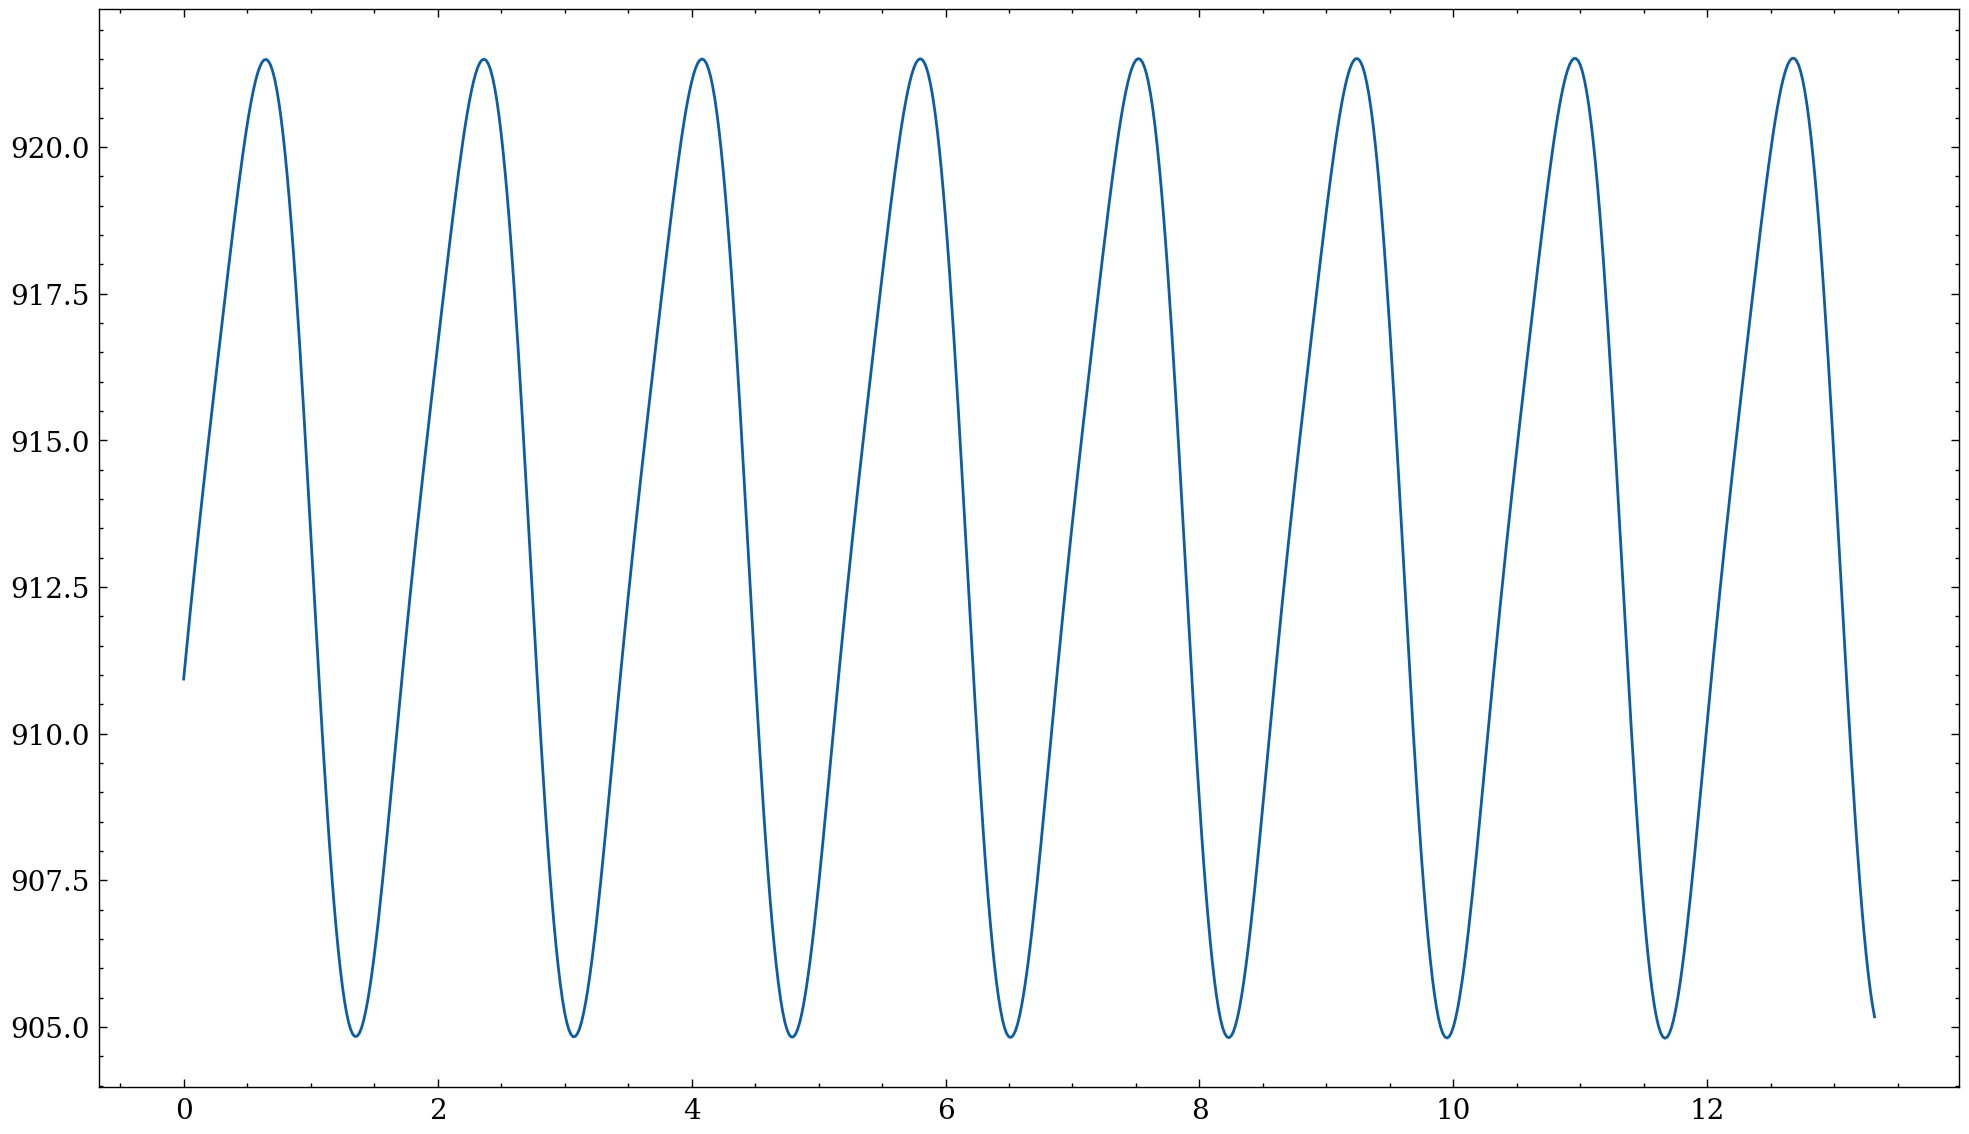

In [22]:
a = 800

trange =np.arange(0,propt,dt)
stateVec0 = np.loadtxt('TLE.out',skiprows = 1,usecols=(1,2,3,4,5,6))
altitude0 = np.array([es.altitude(stateVec0[i]) for i in range(nrange)])

plt.figure(figsize=(12,7))
plt.plot(trange[0:a]/3600,altitude0[0:a]/1000)

# print(stateVec0)